In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm.autonotebook import tqdm 

from traffic.core import Traffic
from traffic.data import airports
from traffic.data import navaids

/tmp/ipykernel_10620/1664592482.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
traffic_to = Traffic.from_file("../deep_traffic_generation/data/training_datasets/to_LSZH_16_100.pkl")
latlon = traffic_to.data.groupby(by="flight_id")[["latitude", "longitude"]].first()
print("Take-offs:", latlon.latitude.mean(), latlon.longitude.mean())

traffic_ga = Traffic.from_file("../deep_traffic_generation/data/training_datasets/ga_LSZH_14_100.pkl")
latlon = traffic_ga.data.groupby(by="flight_id")[["latitude", "longitude"]].first()
print("Go-Arounds:", latlon.latitude.mean(), latlon.longitude.mean())

Take-offs: 47.44463545742907 8.557321498760901
Go-Arounds: 47.500085790354625 8.5114919243637


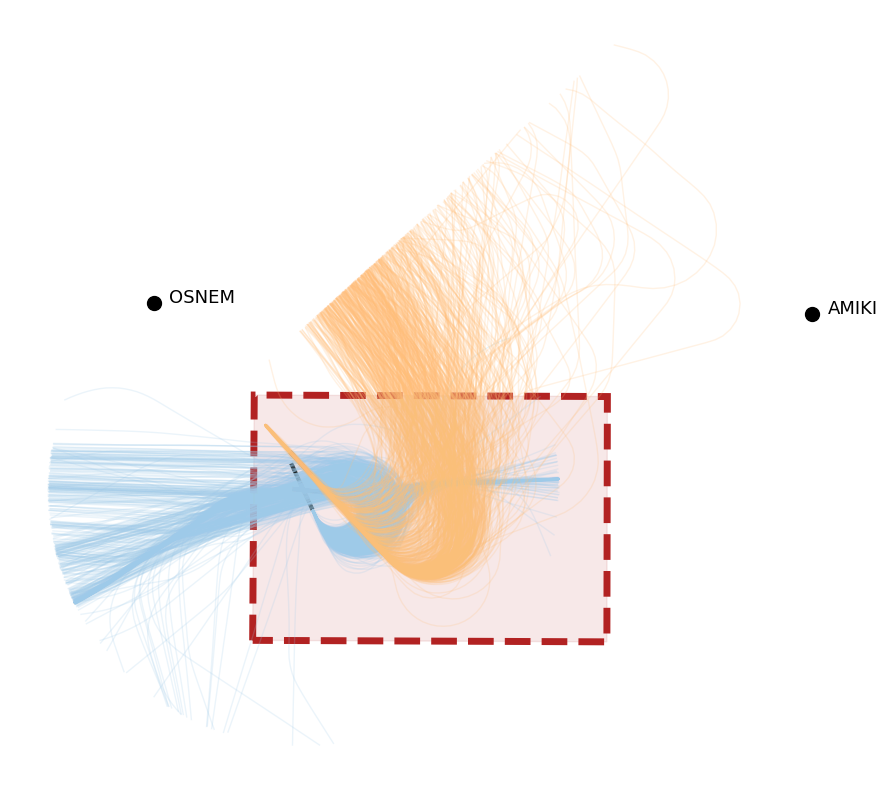

In [11]:
import matplotlib.pyplot as plt
from traffic.core.projection import EuroPP, PlateCarree
from traffic.data import navaids, airports
import matplotlib.patches as mpatches

x = np.array([8.5, 8.5, 8.84, 8.84])
y = np.array([47.36, 47.52, 47.52, 47.36])

poly_corners = np.zeros((len(y), 2), np.float64)
poly_corners[:,0] = x
poly_corners[:,1] = y
poly1 = mpatches.Polygon(poly_corners, 
                        closed=True, 
                        alpha = 0.1,
                        ec='#b22222', 
                        fill=True, 
                        fc='#b22222', 
                        transform = PlateCarree())

poly2 = mpatches.Polygon(poly_corners, 
                        closed=True, 
                        alpha = 1,
                        ec='#b22222', 
                        fill=False, 
                        lw=5,
                        linestyle = "--",
                        transform = PlateCarree())

with plt.style.context("traffic"):
    fig, ax = plt.subplots(figsize=(15, 10), subplot_kw=dict(projection=EuroPP()))

    traffic_to[:1000].plot(ax, alpha=0.2, color = "#9ecae9")
    traffic_ga.plot(ax, alpha = 0.2, color = "#ffbf79")

    airports["LSZH"].plot(ax, footprint=False, runways=dict(lw=1), labels=False)
    navaids["OSNEM"].plot(ax)
    navaids["AMIKI"].plot(ax)
    
    ax.add_patch(poly1)
    ax.add_patch(poly2)

plt.show()

In [14]:
test_ga = traffic_ga.inside_bbox((8.5, 47.36, 8.84, 47.52)).resample(50).eval()
test_to = traffic_to.inside_bbox((8.5, 47.36, 8.84, 47.52)).resample(50).eval()

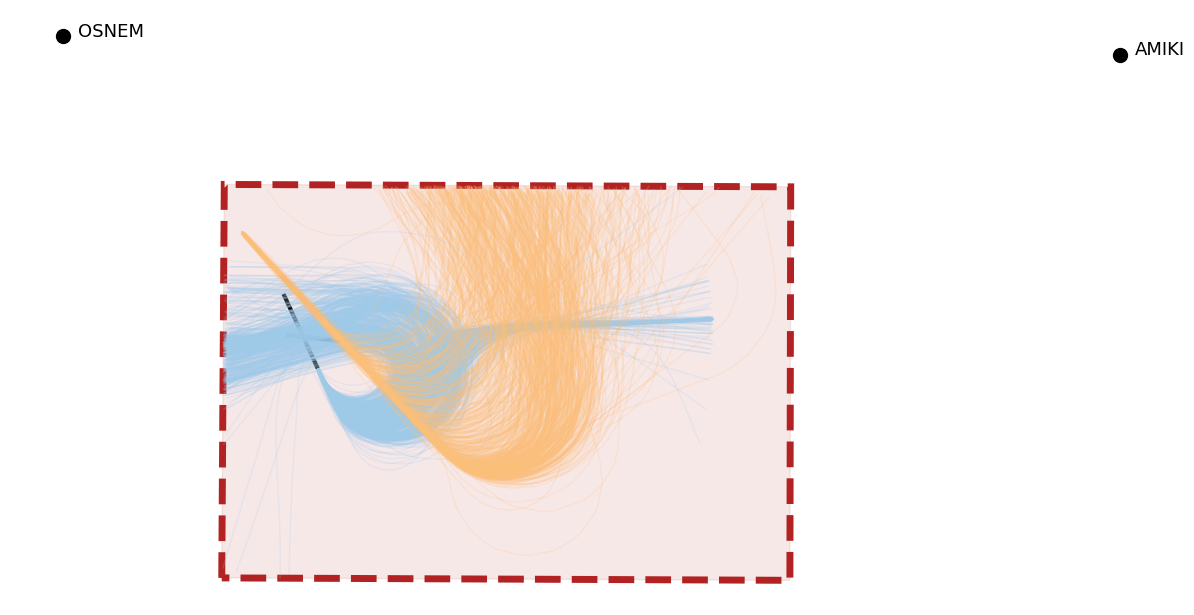

In [19]:
x = np.array([8.5, 8.5, 8.84, 8.84])
y = np.array([47.36, 47.52, 47.52, 47.36])

poly_corners = np.zeros((len(y), 2), np.float64)
poly_corners[:,0] = x
poly_corners[:,1] = y
poly1 = mpatches.Polygon(poly_corners, 
                        closed=True, 
                        alpha = 0.1,
                        ec='#b22222', 
                        fill=True, 
                        fc='#b22222', 
                        transform = PlateCarree())

poly2 = mpatches.Polygon(poly_corners, 
                        closed=True, 
                        alpha = 1,
                        ec='#b22222', 
                        fill=False, 
                        lw=5,
                        linestyle = "--",
                        transform = PlateCarree())

with plt.style.context("traffic"):
    fig, ax = plt.subplots(figsize=(15, 10), subplot_kw=dict(projection=EuroPP()))

    test_to[:1000].plot(ax, alpha=0.2, color = "#9ecae9")
    test_ga.plot(ax, alpha = 0.2, color = "#ffbf79")

    airports["LSZH"].plot(ax, footprint=False, runways=dict(lw=1), labels=False)
    navaids["OSNEM"].plot(ax)
    navaids["AMIKI"].plot(ax)
    
    ax.add_patch(poly1)
    ax.add_patch(poly2)

plt.show()

In [21]:
test_to.to_pickle("../deep_traffic_generation/data/training_datasets/to_LSZH_16_50_bb.pkl")
test_ga.to_pickle("../deep_traffic_generation/data/training_datasets/ga_LSZH_14_50_bb.pkl")